In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [2]:
def create_eval_correct_pairs(basic_llm_data, llm_kg_data):
    pairs = []

    for i in range(len(basic_llm_data) - 3):
        question = basic_llm_data[str(i)]["question"]
        if str(i) in llm_kg_data:
            if "evaluation_score" in llm_kg_data[str(i)]:
                if basic_llm_data[str(i)]["llm_is_correct"]:
                    pairs.append((llm_kg_data[str(i)]["evaluation_score"], 1))
                else:
                    pairs.append((llm_kg_data[str(i)]["evaluation_score"], 0))
                
    return pairs

In [3]:
geography_file_basic = open('output/qa_sets_basic_llm_geography1695750702.298964.json')
geography_data_basic = json.load(geography_file_basic)

# geography_file_kg = open('output/qa_sets_llm_kg_geography_wd_1695220184.822093.json')
# geography_data_kg = json.load(geography_file_kg)

geography_file_eval = open('output/qa_sets_geography_evaluation.json')
geography_data_eval = json.load(geography_file_eval)

geo_pairs = create_eval_correct_pairs(geography_data_basic, geography_data_eval)

geo_pairs_array = np.array(geo_pairs)

geo_y = geo_pairs_array[:, 0]
geo_x = geo_pairs_array[:, 1]

In [4]:
print(geo_pairs_array.shape)

(71, 2)


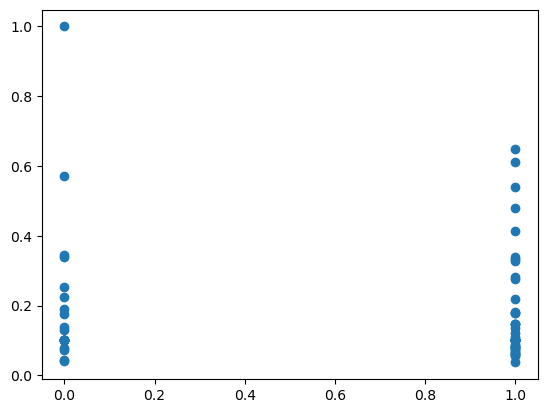

In [5]:
plt.scatter(geo_x, geo_y)
plt.show()

In [6]:
print("Point-Biserial Correlation:", pointbiserialr(geo_x, geo_y))

Point-Biserial Correlation: SignificanceResult(statistic=-0.08498212230230019, pvalue=0.48103552015454487)


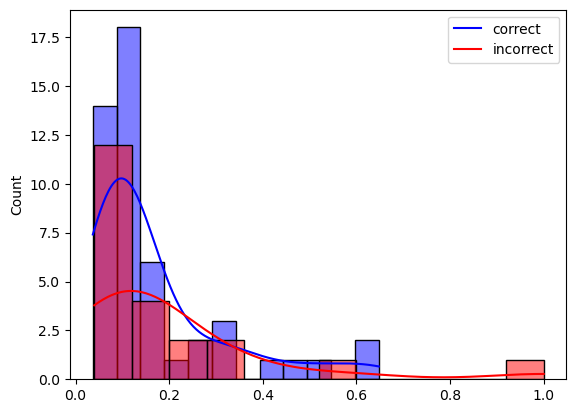

In [7]:
geo_true_opts = geo_pairs_array[geo_pairs_array[:, 1] == 1][:, 0]
geo_false_opts = geo_pairs_array[geo_pairs_array[:, 1] == 0][:, 0]

sns.histplot(geo_true_opts, color='b', kde=True)
sns.histplot(geo_false_opts, color='r', kde=True)

plt.legend(['correct', 'incorrect'])

plt.show()

In [8]:
government_file_basic = open('output/qa_sets_basic_llm_government_and_politics1695751141.861084.json')
government_data_basic = json.load(government_file_basic)

# government_file_kg = open('output/qa_sets_llm_kg_government_and_politics_wd_1695220705.666582.json')
# government_data_kg = json.load(government_file_kg)

government_file_eval = open('output/qa_sets_government_and_politics_evaluation.json')
government_data_eval = json.load(government_file_eval)

gov_pairs = create_eval_correct_pairs(government_data_basic, government_data_eval)

gov_pairs_array = np.array(gov_pairs)

gov_y = gov_pairs_array[:, 0]
gov_x = gov_pairs_array[:, 1]

In [9]:
print(gov_pairs_array.shape)

(62, 2)


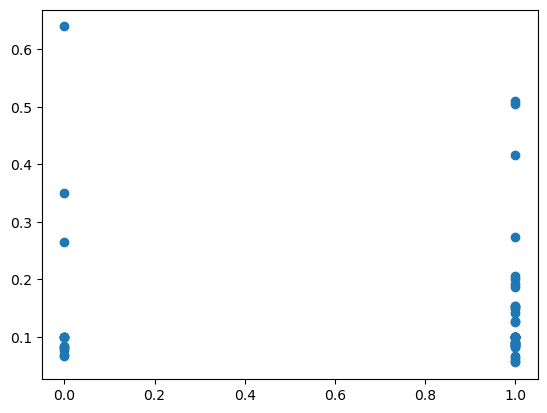

In [10]:
plt.scatter(gov_x, gov_y)
plt.show()

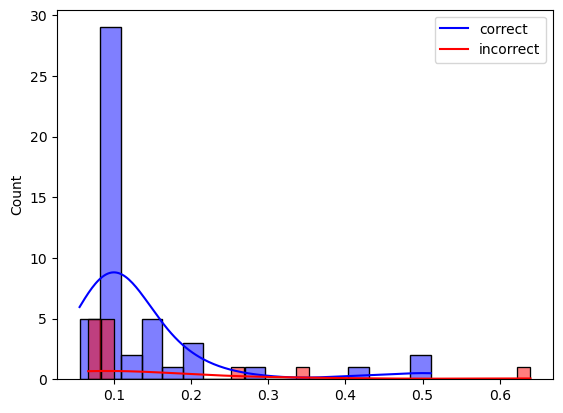

In [11]:
gov_true_opts = gov_pairs_array[gov_pairs_array[:, 1] == 1][:, 0]
gov_false_opts = gov_pairs_array[gov_pairs_array[:, 1] == 0][:, 0]

sns.histplot(gov_true_opts, color='b', kde=True)
sns.histplot(gov_false_opts, color='r', kde=True)

plt.legend(['correct', 'incorrect'])

plt.show()

In [12]:
print("Point-Biserial Correlation:", pointbiserialr(gov_x, gov_y))

Point-Biserial Correlation: SignificanceResult(statistic=-0.09901701717148371, pvalue=0.4438677238720399)


In [13]:
# Sample 50 from misc
misc_file_basic = open('output/qa_sets_basic_llm_miscellaneous_1695753134.334187.json')
misc_data_basic = json.load(misc_file_basic)

misc_file_eval = open('output/qa_sets_miscellaneous_evaluation.json')
misc_data_eval = json.load(misc_file_eval)

misc_pairs = create_eval_correct_pairs(misc_data_basic, misc_data_eval)

misc_pairs_array = np.array(misc_pairs)

misc_y = misc_pairs_array[:, 0]
misc_x = misc_pairs_array[:, 1]

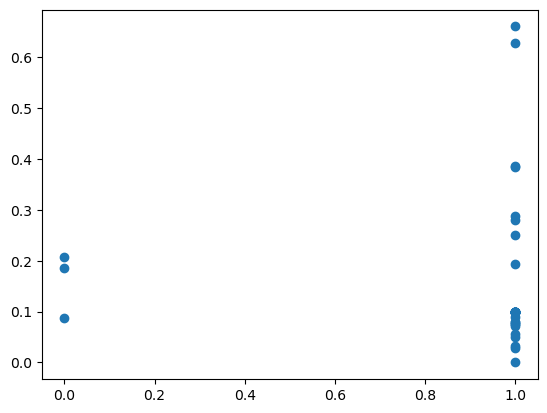

In [14]:
plt.scatter(misc_x, misc_y)
plt.show()

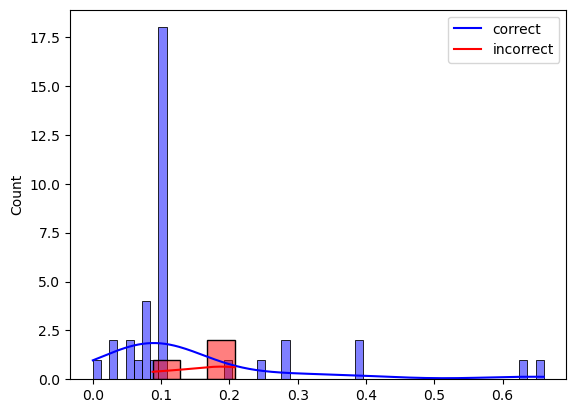

In [15]:
misc_true_opts = misc_pairs_array[misc_pairs_array[:, 1] == 1][:, 0]
misc_false_opts = misc_pairs_array[misc_pairs_array[:, 1] == 0][:, 0]

sns.histplot(misc_true_opts, color='b', kde=True)
sns.histplot(misc_false_opts, color='r', kde=True)

plt.legend(['correct', 'incorrect'])

plt.show()